# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

temp_max = []
humidity = []
wind_speed = []
cloudiness = []
lats_filtered = []
lngs_filtered = []
city_names_filtered = []
weather_dates = []
sunrise = []
sunset = []
countries = []

# Use a counter to limit the number of API calls
counter = 0
set_counter = 1
max_counter = 50
delay_time = 60

# Process the data
for city_name in cities:
    try:
        print(f'Processing data for record {counter % max_counter + 1} set {set_counter} | {city_name}...')
        query_url = f'{base_url}{city_name}&appid={api_key}&units=metric' 
        req = requests.get(query_url)
        city_data = req.json()
        temp_max.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        wind_speed.append(city_data['wind']['speed'])
        cloudiness.append(city_data['clouds']['all'])
        weather_dates.append(city_data['dt'])
        countries.append(city_data['sys']['country'])
        sunrise.append(city_data['sys']['sunrise'])
        sunset.append(city_data['sys']['sunset'])
        lats_filtered.append(city_data['coord']['lat'])
        lngs_filtered.append(city_data['coord']['lon'])
        
        # Keep the city names for each successful API call
        city_names_filtered.append(city_name)
        
    except KeyError:
        print(f'Error processing data for {city_name}')
    
    # Wait every time max counter is reached
    counter = counter + 1
    if (counter % max_counter) == 0:
        set_counter = set_counter + 1
        time.sleep(delay_time)

Processing data for record 1 set 1 | dingle...
Processing data for record 2 set 1 | taolanaro...
Error processing data for taolanaro
Processing data for record 3 set 1 | dzhebariki-khaya...
Processing data for record 4 set 1 | castro...
Processing data for record 5 set 1 | katsuura...
Processing data for record 6 set 1 | wau...
Error processing data for wau
Processing data for record 7 set 1 | sao gabriel da cachoeira...
Processing data for record 8 set 1 | tuktoyaktuk...
Processing data for record 9 set 1 | barrow...
Processing data for record 10 set 1 | illoqqortoormiut...
Error processing data for illoqqortoormiut
Processing data for record 11 set 1 | cape town...
Processing data for record 12 set 1 | nichinan...
Processing data for record 13 set 1 | bengkulu...
Error processing data for bengkulu
Processing data for record 14 set 1 | saint-francois...
Processing data for record 15 set 1 | samusu...
Error processing data for samusu
Processing data for record 16 set 1 | upernavik...
P

Processing data for record 3 set 4 | ondorhaan...
Error processing data for ondorhaan
Processing data for record 4 set 4 | burns lake...
Processing data for record 5 set 4 | vila velha...
Processing data for record 6 set 4 | raga...
Error processing data for raga
Processing data for record 7 set 4 | vidim...
Processing data for record 8 set 4 | iquique...
Processing data for record 9 set 4 | auki...
Processing data for record 10 set 4 | zhanakorgan...
Processing data for record 11 set 4 | ambulu...
Processing data for record 12 set 4 | cabedelo...
Processing data for record 13 set 4 | palabuhanratu...
Error processing data for palabuhanratu
Processing data for record 14 set 4 | port alfred...
Processing data for record 15 set 4 | yendi...
Processing data for record 16 set 4 | darab...
Processing data for record 17 set 4 | mudyuga...
Error processing data for mudyuga
Processing data for record 18 set 4 | kaitangata...
Processing data for record 19 set 4 | mathathane...
Processing data f

Processing data for record 3 set 7 | kindersley...
Processing data for record 4 set 7 | tatarsk...
Processing data for record 5 set 7 | beringovskiy...
Processing data for record 6 set 7 | barra...
Processing data for record 7 set 7 | cap-aux-meules...
Processing data for record 8 set 7 | kaeo...
Processing data for record 9 set 7 | ostrovnoy...
Processing data for record 10 set 7 | cockburn town...
Processing data for record 11 set 7 | westport...
Processing data for record 12 set 7 | hargeysa...
Processing data for record 13 set 7 | sylva...
Processing data for record 14 set 7 | jaragua...
Error processing data for jaragua
Processing data for record 15 set 7 | yining...
Processing data for record 16 set 7 | benghazi...
Processing data for record 17 set 7 | porto novo...
Processing data for record 18 set 7 | maniitsoq...
Processing data for record 19 set 7 | tres lagoas...
Error processing data for tres lagoas
Processing data for record 20 set 7 | cabo san lucas...
Processing data for

Processing data for record 6 set 10 | honiara...
Processing data for record 7 set 10 | ixtapa...
Processing data for record 8 set 10 | samarinda...
Processing data for record 9 set 10 | menongue...
Processing data for record 10 set 10 | soller...
Processing data for record 11 set 10 | sur...
Processing data for record 12 set 10 | tocopilla...
Processing data for record 13 set 10 | navolato...
Processing data for record 14 set 10 | belyy yar...
Processing data for record 15 set 10 | bosobolo...
Processing data for record 16 set 10 | caravelas...
Processing data for record 17 set 10 | yuzhou...
Processing data for record 18 set 10 | bargal...
Error processing data for bargal
Processing data for record 19 set 10 | praia da vitoria...
Processing data for record 20 set 10 | wa...
Error processing data for wa
Processing data for record 21 set 10 | tabas...
Processing data for record 22 set 10 | qaqortoq...
Processing data for record 23 set 10 | tahe...
Processing data for record 24 set 10 | 

Processing data for record 4 set 13 | anaco...
Processing data for record 5 set 13 | qasigiannguit...
Processing data for record 6 set 13 | wellington...
Processing data for record 7 set 13 | acarau...
Error processing data for acarau
Processing data for record 8 set 13 | wilmington...
Processing data for record 9 set 13 | lakatoro...
Processing data for record 10 set 13 | port augusta...
Processing data for record 11 set 13 | emerald...
Processing data for record 12 set 13 | nelson bay...
Processing data for record 13 set 13 | masunga...
Processing data for record 14 set 13 | kirkwall...
Processing data for record 15 set 13 | slave lake...
Processing data for record 16 set 13 | sokoto...
Processing data for record 17 set 13 | bang saphan...
Processing data for record 18 set 13 | mildura...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

day_length = [(sunset[i] - sunrise[i]) / 3600 for i in range(len(sunrise))]

weather_df = pd.DataFrame({'City' : city_names_filtered,
                           'Cloudiness' : cloudiness,
                           'Country' : countries,
                           'Date' : weather_dates,
                           'Humidity' : humidity,
                           'Lat' : lats_filtered,
                           'Lng' : lngs_filtered,
                           'Temp Max' : temp_max,
                           'Wind Speed' :  wind_speed,
                           'Sunrise' : sunrise,
                           'Sunset' : sunset,
                           'Day Length' : day_length
})

weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Temp Max      548
Wind Speed    548
Sunrise       548
Sunset        548
Day Length    548
dtype: int64

In [13]:
weather_df.head()

weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [14]:

weather_df = pd.read_csv(output_data_file)



#### Latitude vs. Humidity Plot

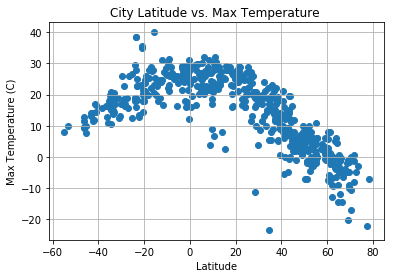

In [28]:
fig = plt.figure()

plt.scatter(weather_df['Lat'], weather_df['Temp Max'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ')
plt.grid()
plt.show()
fig.savefig('./temperature.png')

#### Latitude vs. Cloudiness Plot

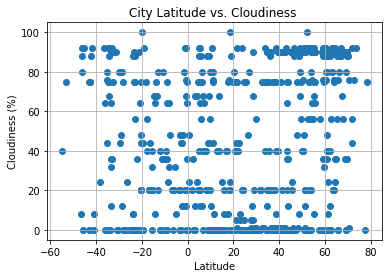

In [29]:
fig = plt.figure()

plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ')
plt.grid()
plt.show()
fig.savefig('./cloudiness.png')

#### Latitude vs. Wind Speed Plot

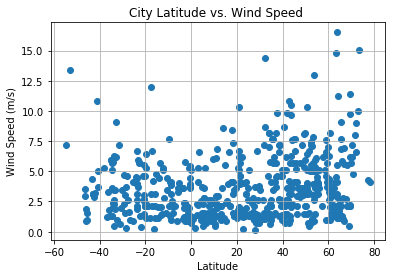

In [30]:
fig = plt.figure()

plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ')
plt.grid()
plt.show()
fig.savefig('./wind_speed.png')

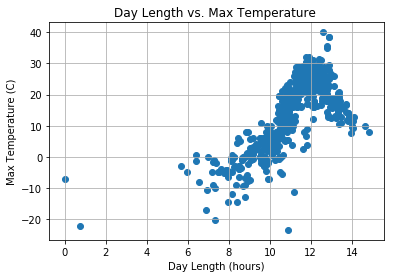

In [31]:

fig = plt.figure()

plt.scatter(weather_df['Day Length'], weather_df['Temp Max'])
plt.xlabel('Day Length (hours)')
plt.ylabel('Max Temperature (C)')
plt.title(f'Day Length vs. Max Temperature ')
plt.grid()
plt.show()
fig.savefig('./length_vs_temperature.png')

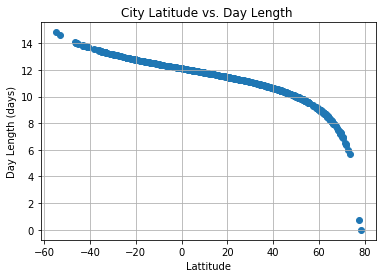

In [32]:
fig = plt.figure()

plt.scatter(weather_df['Lat'], weather_df['Day Length'])
plt.xlabel('Lattitude')
plt.ylabel('Day Length (days)')
plt.title(f'City Latitude vs. Day Length ')
plt.grid()
plt.show()
fig.savefig('./latitude_vs_day_length.png')

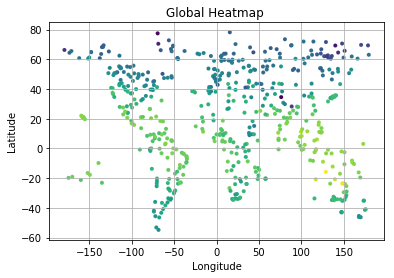

In [35]:
fig = plt.figure()

plt.scatter(weather_df['Lng'], weather_df['Lat'], c=weather_df['Temp Max'], s=15, linewidth=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Global Heatmap ')
plt.grid()
plt.show()
fig.savefig('./heat_map.png')